In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [8]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True) # one_hot transforma los clsificadores en valores binarios, contruye dummies vars

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
X = mnist.train.images

In [13]:
mnist.train.images.shape

(55000, 784)

In [0]:
y = mnist.train.labels

In [0]:
img = X[1, :]
img = img.reshape(28,28)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

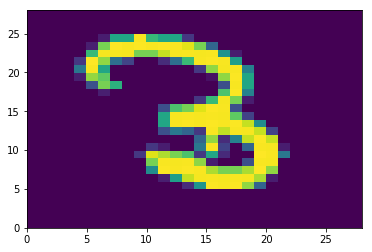

In [26]:
plt.pcolor(img)
plt.show()

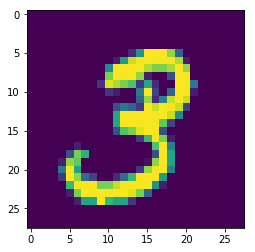

In [29]:
plt.imshow(img)
plt.show()

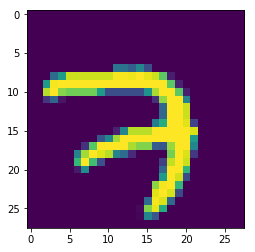

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [31]:
img = X[0, :]
img = img.reshape(28,28)
plt.imshow(img)
plt.show()
y[0]

In [0]:
import numpy as np

In [0]:
index = np.where((y[:,1]!=0) | (y[:,7]!=0 ))[0]

In [36]:
X_train = X[index,:]
X_train.shape

(11894, 784)

In [37]:
y_train = y[index,1]
y_train.shape

(11894,)

In [0]:
from sklearn.svm import SVC, LinearSVC

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
gs = GridSearchCV(LinearSVC(),param_grid={'C':[2**i for i in range(-15,13,1)]},cv=5, return_train_score=True, n_jobs=-1)

In [41]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'C': [3.0517578125e-05, 6.103515625e-05,
                               0.0001220703125, 0.000244140625, 0.00048828125,
                               0.0009765625, 0.001953125, 0.00390625, 0.0078125,
                               0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1,
                               2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048,
                               4096]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [0]:
best_es = gs.best_estimator_

In [0]:
X_test = mnist.test.images

In [0]:
y_test = mnist.test.labels

In [0]:
index_tes = np.where((y_test[:,1]!=0) | (y_test[:,7]!=0 ))[0]

In [0]:
X_te=X_test[]
y_te=y_test

In [0]:
best_es.score(X_te, y_te)

In [0]:
train_sc = gs.cv_results_['mean_train_score']
test_sc = gs.cv_results_['mean_test_score']

In [0]:
train_err= 1- train_sc
test_err = 1-test_sc

In [0]:
plt.plot(np.array([2**i for i in range(-15,13,1)]), train_err, 'b--' ,label='Train Error')
plt.plot(np.array([2**i for i in range(-15,13,1)]), test_err, 'r-' ,label='Test Error')
plt.legend()
plt.xlabel('C')
plt.ylabel('Error')
plt.show()
    

In [0]:
coef = best_es.coef_

In [0]:
coef.shape

In [0]:
coef_img = coef.reshape(28,28)